In [1]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [2]:
from config import get_configs
from utils import load_data,set_seed, metric,masked_mse
from dataset import ODDataset
# from models import MYMODEL, MYMODEL2
from lib import train,test
from baseline import HA

In [3]:
args = get_configs()

In [4]:
x,  te, t_label, adj, y, c, z_adj = load_data(args)
x_train, x_val, adj_train, adj_val, te_train, te_val, y_train, y_val, c_train, c_val, t_label_train, t_label_val = train_test_split(x, adj, te, y, c, t_label, test_size=args.test_size, shuffle=False)
x_val, x_test, adj_val, adj_test, te_val, te_test, y_val, y_test, c_val, c_test, t_label_val, t_label_test = train_test_split(x_val, adj_val,  te_val, y_val, c_val, t_label_val, test_size=0.5, shuffle=False)

In [8]:
te[1][5]

tensor([ 3., 11.])

In [5]:
adj[0][0].shape

torch.Size([66, 66])

In [7]:
true_adj = pd.read_csv('../data/processed data/adj.csv',index_col=0).values

In [8]:
true_adj.shape

(66, 66)

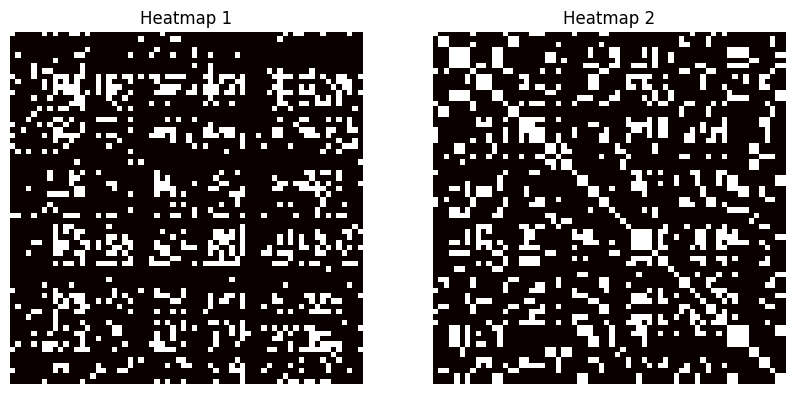

In [9]:
import torch
import matplotlib.pyplot as plt

# 创建两个示例的二维张量
data1 = torch.rand((10, 10))
data2 = torch.rand((10, 10))

# 创建一个包含两个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图中绘制热力图
axs[0].imshow(adj[0][0].cpu(), cmap='hot', interpolation='nearest')
axs[0].set_title('Heatmap 1')
axs[0].axis('off')  # 关闭坐标轴

# 在第二个子图中绘制热力图
axs[1].imshow(true_adj, cmap='hot', interpolation='nearest')
axs[1].set_title('Heatmap 2')
axs[1].axis('off')  # 关闭坐标轴

plt.show()

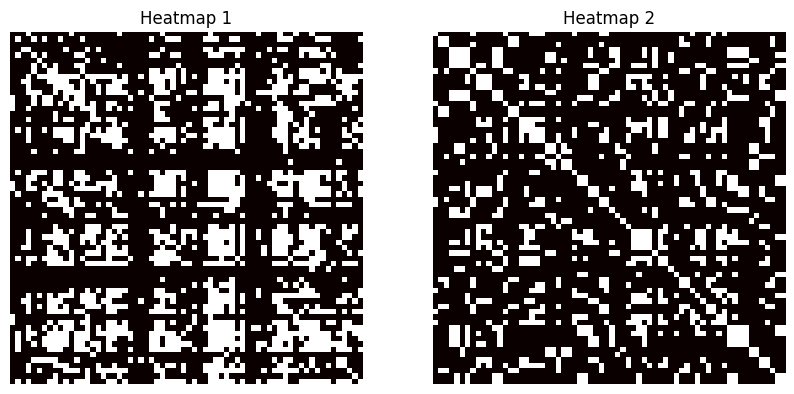

In [11]:
import torch
import matplotlib.pyplot as plt

# 创建两个示例的二维张量
data1 = torch.rand((10, 10))
data2 = torch.rand((10, 10))

# 创建一个包含两个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图中绘制热力图
axs[0].imshow(adj[1][1].cpu(), cmap='hot', interpolation='nearest')
axs[0].set_title('Heatmap 1')
axs[0].axis('off')  # 关闭坐标轴

# 在第二个子图中绘制热力图
axs[1].imshow(true_adj, cmap='hot', interpolation='nearest')
axs[1].set_title('Heatmap 2')
axs[1].axis('off')  # 关闭坐标轴

plt.show()

In [5]:
def t_emb(t):
    d_w_list = range(1, 8)  # day of week
    d_w_oh_list = np.eye(len(d_w_list))  # one hot
    d_w_emb = d_w_oh_list[d_w_list.index(t[0].weekday() + 1)]  # day of week embedding
    h_d_list = range(0, 24)  # hour of day
    h_d_oh_list = np.eye(len(h_d_list))  # one hot
    h_d_emb = h_d_oh_list[h_d_list.index(t[1])]
    emb = np.hstack((d_w_emb, h_d_emb))
    return emb

In [6]:
x = torch.sum(x,dim=0)
x = torch.sum(x,dim=0)

In [7]:
x.shape

torch.Size([66, 66])

In [8]:
torch.nonzero(x).shape

torch.Size([4328, 2])

In [9]:
66*66

4356

In [10]:
te[0].shape

torch.Size([48, 31])

In [11]:
te_train[0][24]

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
te_test[0][24]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
te_test[1][24]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
te_test[1][42]

tensor([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
import torch

# 假设你有一个形状为（B, T, N, D）的特征张量
B, T, N, D = 2, 3, 4, 3
features = torch.rand(B, T, N, D)

# 将特征张量扩展为（B, T, N, 1, D）和（B, T, 1, N, D）的形状
expanded_features1 = features.unsqueeze(3)  # shape: (B, T, N, 1, D)
expanded_features2 = features.unsqueeze(2)  # shape: (B, T, 1, N, D)

# 拼接特征并交换维度
concatenated_features = torch.cat((expanded_features1, expanded_features2), dim=4)  # shape: (B, T, N, N, 2D)
concatenated_features = concatenated_features.permute(0, 1, 3, 2, 4)  # 交换维度，变为 (B, T, N, N, 2D)

# 打印结果
print(concatenated_features)


In [ ]:
B, T, N, D = 2, 3, 4, 3
features = torch.Tensor([[[1,2],[3,4],[5,6]],[[11,12],[13,14],[15,16]]])
features.shape

In [ ]:
expanded_features1 = features.unsqueeze(1)  # shape: (B, T, N, 1, D)
expanded_features2 = features.unsqueeze(2)  # shape: (B, T, 1, N, D)

In [ ]:
expanded_features1 = expanded_features1.repeat(1,3,1,1)

In [ ]:
expanded_features1.shape

In [ ]:
expanded_features2 = expanded_features2.repeat(1,1,3,1)

In [ ]:
expanded_features2.shape

In [ ]:
concatenated_features = torch.cat((expanded_features2, expanded_features1), dim=3)

In [ ]:
concatenated_features

In [ ]:
concatenated_features[0][2][0]

In [ ]:
concatenated_features[1][2][0]

In [ ]:
import torch
z = torch.FloatTensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
z = z.reshape(2,2,4)
z

In [ ]:
def get_shift_list():
        idxs = np.arange(24) # [0,..,23]
        window_size = 24 
        window_list = np.arange(-(window_size-1)//2,(window_size-1)//2+1,1) # [-2,-1,0,1,2,3]
        shift_list = []
        for i in window_list:
            tmp = idxs+i
            tmp[tmp<0] = tmp[tmp<0] + len(idxs)
            tmp[tmp>23] = tmp[tmp>23] - len(idxs)
            shift_list.append(tmp)
        shift_list = np.array(shift_list)
        return shift_list,window_list

In [ ]:
import numpy as np
shift_list,window_list = get_shift_list()

In [ ]:
shift_list

In [6]:
import torch

content = torch.load('../model/model_meta_seed_114514__epoch_300_batchsize_32_lr_0.001.pth')

# 使用读取的数据
print(content.keys())

odict_keys(['fc_out.weight', 'fc_out.bias', 'fc_x.weight', 'fc_x.bias', 'ste.sf.weight', 'ste.sf.bias', 'ste.pf.weight', 'ste.pf.bias', 'ste.tf.weight', 'ste.tf.bias', 'ste.fc_s.weight', 'ste.fc_s.bias', 'ste.fc_p.weight', 'ste.fc_p.bias', 'ste.fc_t.weight', 'ste.fc_t.bias', 'ste.fc_spe.weight', 'ste.fc_spe.bias', 'ste.fc_ste.weight', 'ste.fc_ste.bias', 'transformAttention.mlp_q.weight', 'transformAttention.mlp_q.bias', 'transformAttention.mlp_k.weight', 'transformAttention.mlp_k.bias', 'transformAttention.mlp_v.weight', 'transformAttention.mlp_v.bias', 'transformAttention.out.weight', 'transformAttention.out.bias', 'sta_encoder.0.fc_q.weight', 'sta_encoder.0.fc_q.bias', 'sta_encoder.0.fc_k.weight', 'sta_encoder.0.fc_k.bias', 'sta_encoder.0.fc_v.weight', 'sta_encoder.0.fc_v.bias', 'sta_encoder.0.dense.weight', 'sta_encoder.0.dense.bias', 'sta_encoder.0.LayerNorm.weight', 'sta_encoder.0.LayerNorm.bias', 'sta_encoder.1.fc_q.weight', 'sta_encoder.1.fc_q.bias', 'sta_encoder.1.fc_k.weight',

In [24]:
x = torch.ones(16,24,66,66,128)

In [25]:
a = torch.matmul(x,x.transpose(-1,-2))

In [26]:
a[0][0][0]

tensor([[128., 128., 128.,  ..., 128., 128., 128.],
        [128., 128., 128.,  ..., 128., 128., 128.],
        [128., 128., 128.,  ..., 128., 128., 128.],
        ...,
        [128., 128., 128.,  ..., 128., 128., 128.],
        [128., 128., 128.,  ..., 128., 128., 128.],
        [128., 128., 128.,  ..., 128., 128., 128.]])

In [28]:
x = torch.Tensor([[[1,2,3],[4,5,6]],[[11,12,13],[14,15,16]]])

In [29]:
x.shape

torch.Size([2, 2, 3])

In [30]:
x[0][0]

tensor([1., 2., 3.])

In [31]:
x[0][1]

tensor([4., 5., 6.])

In [32]:
N,N,D = x.size()

In [44]:
 # 查询、键和值
query = x
key = x
value = x

# 计算注意力分数
scores = torch.matmul(query, key.transpose(1, 2))

In [50]:
scores.shape

torch.Size([2, 2, 2])

In [48]:
scores[0][0][0]

tensor(14.)

In [49]:
scores[0][0][1]

tensor(32.)

In [10]:
import numpy as np
window_list = np.arange(-(1-1)//2-1,(1-1)//2,1)

In [11]:
window_list

array([-1])

In [72]:
import torch

In [73]:
x = torch.FloatTensor([[[1,2],[3,4]],[[5,6],[7,8]]])

In [74]:
x.shape

torch.Size([2, 2, 2])

In [75]:
x

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [76]:
x[0][0]

tensor([1., 2.])

In [77]:
x[0][1]

tensor([3., 4.])

In [78]:
x[1][0]

tensor([5., 6.])

In [79]:
x[1][1]

tensor([7., 8.])

In [80]:
x[0][0].matmul(x[0][0])

tensor(5.)

In [81]:
x[0][0].matmul(x[0][1])

tensor(11.)

In [82]:
x[0][1].matmul(x[0][0])

tensor(11.)

In [83]:
x[0][1].matmul(x[0][1])

tensor(25.)

In [84]:
x[1][0].matmul(x[1][0])

tensor(61.)

In [85]:
x[1][0].matmul(x[1][1])

tensor(83.)

In [86]:
x[1][1].matmul(x[1][0])

tensor(83.)

In [87]:
x[1][1].matmul(x[1][1])

tensor(113.)

In [88]:
y = x.matmul(x.transpose(-1,-2))

In [89]:
y.shape

torch.Size([2, 2, 2])

In [90]:
y[1][0]

tensor([61., 83.])

In [91]:
z = torch.matmul(x,y)

In [92]:
z

tensor([[[  27.,   61.],
         [  59.,  133.]],

        [[ 803., 1093.],
         [1091., 1485.]]])

In [93]:
z[0][0]

tensor([27., 61.])

In [94]:
x[0][0]

tensor([1., 2.])

In [95]:
x[1][0]

tensor([5., 6.])

In [96]:
torch.matmul(x[0][0],x[0][0])

tensor(5.)

In [97]:
torch.matmul(x[0][0],x[1][0])

tensor(17.)

In [98]:
torch.matmul(x[1][0],x[0][0])

tensor(17.)

In [99]:
torch.matmul(x[1][0],x[1][0])

tensor(61.)

In [104]:
x_trans = x.transpose(0,1)

In [105]:
x_trans

tensor([[[1., 2.],
         [5., 6.]],

        [[3., 4.],
         [7., 8.]]])

In [106]:
x_trans[0][0]

tensor([1., 2.])

In [107]:
x_trans[0][1]

tensor([5., 6.])

In [108]:
x_trans[1][0]

tensor([3., 4.])

In [109]:
a = x_trans.matmul(x_trans.transpose(-1,-2))

In [110]:
a

tensor([[[  5.,  17.],
         [ 17.,  61.]],

        [[ 25.,  53.],
         [ 53., 113.]]])

In [111]:
a[0][0]

tensor([ 5., 17.])

In [112]:
a[0][1]

tensor([17., 61.])

In [1]:
import numpy as np

In [ ]:
z = np.load('oddata.npy', allow_pickle=True)

In [ ]:
z.shape